In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/SrushtiChauhan/Test-2022/main/HERPES_comments_individual.csv", 
                          on_bad_lines='skip');

In [2]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=be760de59a20177bc2251cd5ce4b4fba7cd9a1d070b90585849509d313a7931f
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [3]:
df.shape

(8000, 4)

In [4]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [5]:
my_dataframe = pysqldf("""select * from df where Comment!='[removed]' and Comment!='[deleted]' """)
my_dataframe

,ID,Comment,Comment_Created,Score
0,60xlxh,Hi there. I'm wondering if we are still allowe...,2022-03-23 07:02:58,1
1,60xlxh,To post photos in the sub you need to first up...,2022-03-24 00:01:17,2
2,60xlxh,Thank you so much,2022-03-26 23:40:04,2
3,npznfp,Interesting to know the majority has successfu...,2021-06-02 03:16:36,23
4,npznfp,I loved reading this. Thank you for sharing. I...,2021-06-13 04:17:11,12
...,...,...,...,...
7922,ti86gw,Been in the same situation and it made me feel...,2022-03-20 01:33:10,1
7923,ti86gw,And no it’s not a for sure thing she got it.. ...,2022-03-20 01:33:48,1
7924,ti86gw,I can't lie and say I don't regret getting wit...,2022-03-20 06:08:02,1
7925,ti86gw,Unlikely tbh. You should tell her though. \n\n...,2022-03-20 06:43:41,1


In [6]:
my_dataframe.shape

(7927, 4)

In [7]:
!pip install emoji

     |████████████████████████████████| 175 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=735d6c6b5748d57a0ba3eba78608ef0a3290a06e9c8fc170d903ef20360147d2
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [8]:
import emoji
import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [9]:
my_dataframe["emojis"] = [' '.join(emoji for emoji in split_count(t)) for t in my_dataframe['Comment']]

In [10]:
my_dataframe

,ID,Comment,Comment_Created,Score,emojis
0,60xlxh,Hi there. I'm wondering if we are still allowe...,2022-03-23 07:02:58,1,
1,60xlxh,To post photos in the sub you need to first up...,2022-03-24 00:01:17,2,
2,60xlxh,Thank you so much,2022-03-26 23:40:04,2,
3,npznfp,Interesting to know the majority has successfu...,2021-06-02 03:16:36,23,
4,npznfp,I loved reading this. Thank you for sharing. I...,2021-06-13 04:17:11,12,
...,...,...,...,...,...
7922,ti86gw,Been in the same situation and it made me feel...,2022-03-20 01:33:10,1,
7923,ti86gw,And no it’s not a for sure thing she got it.. ...,2022-03-20 01:33:48,1,
7924,ti86gw,I can't lie and say I don't regret getting wit...,2022-03-20 06:08:02,1,
7925,ti86gw,Unlikely tbh. You should tell her though. \n\n...,2022-03-20 06:43:41,1,


In [11]:
my_dataframe["emojis"][0]

''

In [12]:
my_df = pysqldf("""select * from my_dataframe where emojis!='' """)
my_df

,ID,Comment,Comment_Created,Score,emojis
0,npznfp,I was having a breakout that lasted me 3 weeks...,2022-03-19 00:50:27,1,🤞🏽
1,npznfp,Yea 😕,2021-10-16 12:39:37,1,😕
2,tynsw3,I’m a great ass mom to a 2 year old! He keeps ...,2022-04-07 22:20:57,3,💪🏼 💪🏼 🤌🏼
3,tynsw3,"❤️🙏 \nAmazing post, thank you. \n\nWe need mor...",2022-04-07 22:04:10,2,❤️ 🙏
4,tynsw3,"I’m an amazing dog mom, a marathon runner, and...",2022-04-07 23:03:20,2,❤️
...,...,...,...,...,...
534,tixdxh,Very 😩,2022-03-21 04:48:25,2,😩
535,tixdxh,I've noticed that when I first got it. Btw als...,2022-03-21 08:14:52,2,🤷‍♀️
536,tigki2,"Thank you, deep breaths 😮‍💨 lol",2022-03-20 15:19:23,2,😮‍💨
537,tis1wv,Ya I had that! Tried everything but it just en...,2022-03-21 09:44:54,1,🧡


In [13]:
my_df["emojis"][0]

'🤞🏽'

In [14]:
emoji.demojize(my_df["Comment"][538])

'PREACH, my friend. \n\n:clapping_hands::clapping_hands::clapping_hands:'

In [15]:
emoji.demojize(my_df["emojis"][538])

':clapping_hands: :clapping_hands: :clapping_hands:'

In [16]:
my_df["emotions"] = [emoji.demojize(t) for t in my_df['emojis']]

In [17]:
my_df

,ID,Comment,Comment_Created,Score,emojis,emotions
0,npznfp,I was having a breakout that lasted me 3 weeks...,2022-03-19 00:50:27,1,🤞🏽,:crossed_fingers_medium_skin_tone:
1,npznfp,Yea 😕,2021-10-16 12:39:37,1,😕,:confused_face:
2,tynsw3,I’m a great ass mom to a 2 year old! He keeps ...,2022-04-07 22:20:57,3,💪🏼 💪🏼 🤌🏼,:flexed_biceps_medium-light_skin_tone: :flexed...
3,tynsw3,"❤️🙏 \nAmazing post, thank you. \n\nWe need mor...",2022-04-07 22:04:10,2,❤️ 🙏,:red_heart: :folded_hands:
4,tynsw3,"I’m an amazing dog mom, a marathon runner, and...",2022-04-07 23:03:20,2,❤️,:red_heart:
...,...,...,...,...,...,...
534,tixdxh,Very 😩,2022-03-21 04:48:25,2,😩,:weary_face:
535,tixdxh,I've noticed that when I first got it. Btw als...,2022-03-21 08:14:52,2,🤷‍♀️,:woman_shrugging:
536,tigki2,"Thank you, deep breaths 😮‍💨 lol",2022-03-20 15:19:23,2,😮‍💨,:face_exhaling:
537,tis1wv,Ya I had that! Tried everything but it just en...,2022-03-21 09:44:54,1,🧡,:orange_heart:


In [18]:
# Start with loading all necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
% matplotlib inline

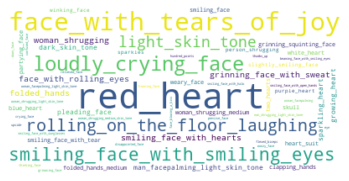

In [19]:
data = my_df

#Creating the text variable
text = " ".join(data.emotions)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

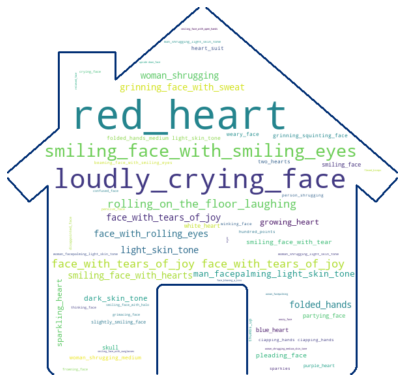

In [21]:
#https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
#https://www.geeksforgeeks.org/generate-word-clouds-of-any-shape-in-python/
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

import requests

# Generate a word cloud image
stopwords = set(STOPWORDS)

mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

#mask = np.array(Image.open("/content/drive/My Drive/reddit.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='white', 
                      #max_words=500, 
                      mask=mask,
                      contour_color='#023075',contour_width=3
                      #,colormap='rainbow'
                      ).generate(' '.join(my_df['emotions']))
# create image as cloud
plt.figure().set_size_inches(7, 9)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

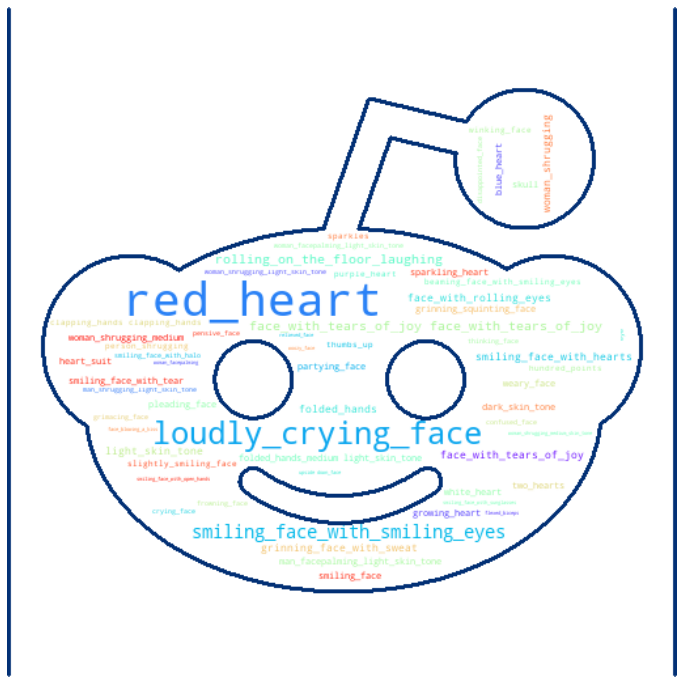

In [22]:
mask = np.array(Image.open(requests.get('https://cdn-icons-png.flaticon.com/512/52/52191.png', stream=True).raw))

wordcloud = WordCloud(stopwords=stopwords,background_color='white', 
                      max_words=500, 
                      mask=mask,
                      contour_color='#023075',contour_width=3
                      ,colormap='rainbow'
                      ).generate(' '.join(my_df['emotions']))
# create image as cloud
plt.figure().set_size_inches(12, 15)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

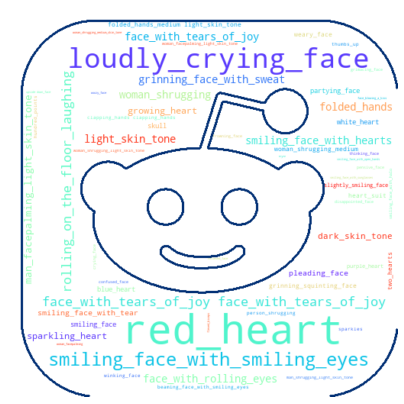

In [23]:
mask = np.array(Image.open(requests.get('https://www.freeiconspng.com/uploads/blue-reddit-icon-8.png', stream=True).raw))

wordcloud = WordCloud(stopwords=stopwords,background_color='white', 
                      max_words=500, 
                      mask=mask,
                      contour_color='#023075',contour_width=3
                      ,colormap='rainbow'
                      ).generate(' '.join(my_df['emotions']))
# create image as cloud
plt.figure().set_size_inches(7, 9)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()